<a href="https://colab.research.google.com/github/Sagnikabhol/Customers-CHURN-Prediction/blob/main/Customer_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_customer = 500

ages = np.random.randint(18,70,n_customer)
gender = np.random.randint(0,2,n_customer)
income = np.random.normal(50,15,n_customer).round(2)
purchase_freq = np.random.poisson(3,n_customer)

churn = ((income<40)&(purchase_freq<3)).astype(int)

df_customer = pd.DataFrame({
    'Ages':ages,
    'Gender':gender,
    'Income':income,
    'Purchase_freq':purchase_freq,
    'Churn':churn
})

df_customer.to_csv('customer.csv',index=False)

print("Customer data created and saved to 'customer.csv")
print(df_customer.head())

Customer data created and saved to 'customer.csv
   Ages  Gender  Income  Purchase_freq  Churn
0    56       1   24.45              2      1
1    69       0   49.17              2      0
2    46       0   55.76              4      0
3    32       1   49.51              4      0
4    60       0   18.99              1      1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

df = pd.read_csv("customer.csv")

df.head()

,Ages,Gender,Income,Purchase_freq,Churn
0,56,1,24.45,2,1
1,69,0,49.17,2,0
2,46,0,55.76,4,0
3,32,1,49.51,4,0
4,60,0,18.99,1,1


In [ ]:
# data info and check for nulls
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ages           500 non-null    int64  
 1   Gender         500 non-null    int64  
 2   Income         500 non-null    float64
 3   Purchase_freq  500 non-null    int64  
 4   Churn          500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
Ages,0
Gender,0
Income,0
Purchase_freq,0
Churn,0


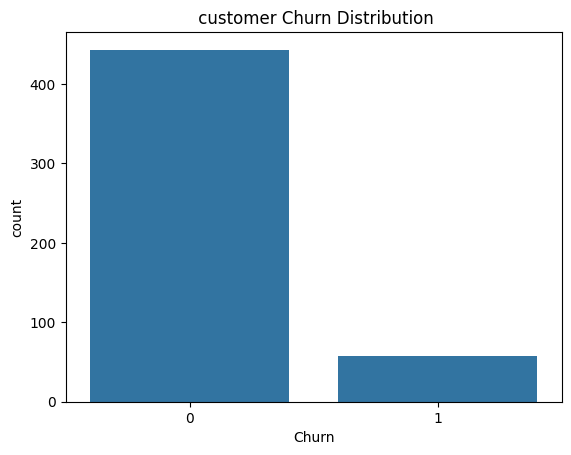

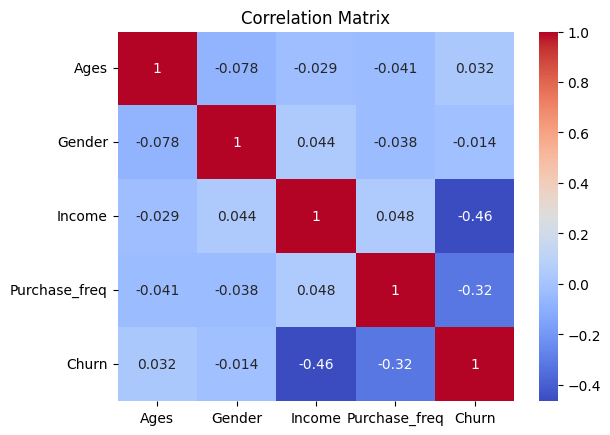

In [ ]:
# churn distribution
sns.countplot(x='Churn',data=df)
plt.title(' customer Churn Distribution')
plt.show()
# Corrlation matrix
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
x = df.drop("Churn",axis=1)
y = df['Churn']
# spilt into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# train model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Accuracy score: 0.91
Confusion matrix:
 [[85  2]
 [ 7  6]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        87
           1       0.75      0.46      0.57        13

    accuracy                           0.91       100
   macro avg       0.84      0.72      0.76       100
weighted avg       0.90      0.91      0.90       100



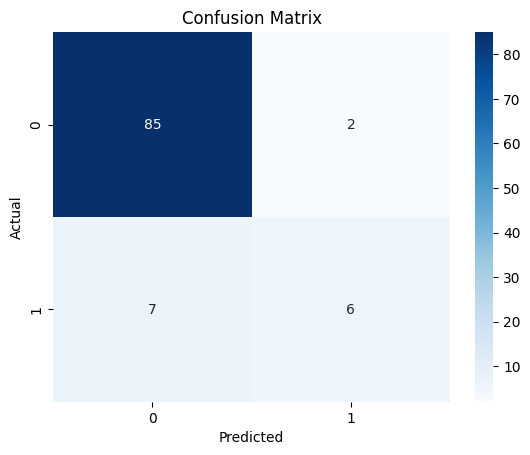

In [ ]:
# predict
y_pred = model.predict(x_test)
# Accuracy
print("Accuracy score:",accuracy_score(y_test,y_pred))
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm)
# classification report
print("Classification report:\n",classification_report(y_test,y_pred))
# visulize confusion matrix
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# new sample customers
new_customers = pd.DataFrame({
    'Ages':[28],
    'Gender':[1],
    'Income':[37],
    'Purchase_freq':[2]
})
# predict churn
prediction = model.predict(new_customers)
# diplay prediction result with label
if prediction==1:
  print("This customer is likely to CHURN. Consider offering retention benefits.")
else:
    print("This customer is likely to STAY. Continue to engage with them.")

This customer is likely to STAY. Continue to engage with them.
